# Instacart Data Analysis
In this project, I worked with Instacart's datasets to explore and clean order data. The main goals were to identify and remove duplicate entries, analyze specific ordering patterns (like orders placed on Wednesdays at 2:00 AM), and ensure the integrity of the data for further analysis. I loaded the relevant datasets, performed data cleaning steps, and adjusted the notebook by adding/removing duplicate checks and filtering logic.

## Find and remove duplicate values 

### `orders` data frame

In [1]:
# Import the Pandas library
import pandas as pd

# Set the path for datasets
data_path = "/Users/nickglenny/Instacart Data/"

# Load all the datasets
orders_df = pd.read_csv(f"{data_path}instacart_orders.csv", delimiter=";", encoding="utf-8")
products_df = pd.read_csv(f"{data_path}products.csv", delimiter=";", encoding="utf-8")
departments_df = pd.read_csv(f"{data_path}departments.csv", delimiter=";", encoding="utf-8")
order_products_df = pd.read_csv(f"{data_path}order_products.csv", delimiter=";", encoding="utf-8")
aisles_df = pd.read_csv(f"{data_path}aisles.csv", delimiter=";", encoding="utf-8")


# Check for duplicated orders

# Check for duplicate rows
duplicate_rows_count = orders_df.duplicated().sum()

# Check for duplicate order_id values
duplicate_order_ids_count = orders_df['order_id'].duplicated().sum()

# Print results
print("Duplicate Rows:", duplicate_rows_count)
print("Duplicate Order IDs:", duplicate_order_ids_count)


Duplicate Rows: 15
Duplicate Order IDs: 15


In [2]:
# Check for all orders placed Wednesday at 2:00 AM

# Filter orders placed on Wednesday (order_dow = 2) at 2:00 AM (order_hour_of_day = 2)
wednesday_2am_orders = orders_df[(orders_df['order_dow'] == 2) & (orders_df['order_hour_of_day'] == 2)]

# Display results
print(wednesday_2am_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

In [3]:
# Remove duplicate orders

# Remove duplicate orders, using 'order_id'
orders_df_no_duplicates = orders_df.drop_duplicates(subset=['order_id'])

# Display the cleaned dataset
orders_df_no_duplicates.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# Double check for duplicate rows
duplicate_rows = orders_df_no_duplicates.duplicated().sum()

# Display the total number of duplicate rows found
duplicate_rows


np.int64(0)

In [5]:
# Double check for duplicate order IDs only
duplicate_order_ids_cleaned = orders_df_no_duplicates.duplicated(subset=['order_id']).sum()

# Display the number of duplicate order IDs found in the cleaned dataset
duplicate_order_ids_cleaned


np.int64(0)

### `products` data frame

In [6]:
# Check for fully duplicate rows



# Check for fully duplicate rows
duplicate_rows_count = products_df.duplicated().sum()

# Display the number of fully duplicate rows found
duplicate_rows_count


np.int64(0)

In [7]:
# Check for just duplicate product IDs
duplicate_product_ids_count = products_df.duplicated(subset=['product_id']).sum()

# Display the number of duplicate product IDs found
duplicate_product_ids_count


np.int64(0)

In [8]:
# Check for just duplicate product names (convert names to lowercase to compare better)
duplicate_product_names_count = products_df.duplicated(subset=['product_name'], keep=False).sum()

# Display the number of duplicate product names found
duplicate_product_names_count


np.int64(1258)

In [9]:
# Check for duplicate product names that aren't missing
non_missing_duplicate_product_names_count = products_df[products_df['product_name'].notna()] \
    .duplicated(subset=['product_name'], keep=False).sum()

# Display the number of duplicate product names that are not missing
non_missing_duplicate_product_names_count


np.int64(0)

### `departments` data frame

In [10]:
# Although this data frame ended up being clean, as good practice I prepared the data for analysis 

# Verifying dataset is clean by checking data types, identifying missing values, and checking and removing duplicate values

# Display initial info about data types and missing values
departments_info = departments_df.info()

# Check for missing values
missing_values = departments_df.isnull().sum()

# Check for duplicate rows
duplicate_rows_count = departments_df.duplicated().sum()

# Convert department_id to integer, if needed (it was not)
if not pd.api.types.is_integer_dtype(departments_df["department_id"]):
    departments_df["department_id"] = pd.to_numeric(departments_df["department_id"], errors="coerce").astype("Int64")

# Fill missing values (if any) with appropriate placeholders
departments_df.fillna({"department": "Unknown"}, inplace=True)

# Remove duplicate rows
departments_df = departments_df.drop_duplicates()

# Display cleaned dataset info
cleaned_departments_info = departments_df.info()

# Show the cleaned dataset
departments_df.head()


# Verify findings
departments_info, missing_values, duplicate_rows_count, cleaned_departments_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


(None,
 department_id    0
 department       0
 dtype: int64,
 np.int64(0),
 None)

### `aisles` data frame

In [11]:

# Display initial info about data types and missing values
aisles_info_before = aisles_df.info()

# Check for missing values
missing_values_before = aisles_df.isnull().sum()

# Check for duplicate rows
duplicate_rows_count_before = aisles_df.duplicated().sum()

# Convert aisle_id to integer if needed
if not pd.api.types.is_integer_dtype(aisles_df["aisle_id"]):
    aisles_df["aisle_id"] = pd.to_numeric(aisles_df["aisle_id"], errors="coerce").astype("Int64")

# Fill missing values (if any) with appropriate placeholders
aisles_df.fillna({"aisle": "Unknown"}, inplace=True)

# Remove duplicate rows
aisles_df = aisles_df.drop_duplicates()

# Display cleaned dataset info
aisles_info_after = aisles_df.info()

# Check for missing values and duplicates after cleaning
missing_values_after = aisles_df.isnull().sum()
duplicate_rows_count_after = aisles_df.duplicated().sum()

# Display the cleaned aisles dataset
aisles_df.head(), aisles_info_before, missing_values_before, duplicate_rows_count_before, aisles_info_after, missing_values_after, duplicate_rows_count_after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


(   aisle_id                       aisle
 0         1       prepared soups salads
 1         2           specialty cheeses
 2         3         energy granola bars
 3         4               instant foods
 4         5  marinades meat preparation,
 None,
 aisle_id    0
 aisle       0
 dtype: int64,
 np.int64(0),
 None,
 aisle_id    0
 aisle       0
 dtype: int64,
 np.int64(0))

### `order_products` data frame

In [12]:
# Check for fully duplicate rows



# Check for duplicate rows
duplicate_rows_count_before = order_products_df.duplicated().sum()

# Drop duplicate rows
order_products_df = order_products_df.drop_duplicates()
duplicate_rows_count_after = order_products_df.duplicated().sum()
3
# Verify the new dataset
order_products_df.head(), duplicate_rows_count_before, duplicate_rows_count_after

(   order_id  product_id  add_to_cart_order  reordered
 0   2141543       11440               17.0          0
 1    567889        1560                1.0          1
 2   2261212       26683                1.0          1
 3    491251        8670               35.0          1
 4   2571142        1940                5.0          1,
 np.int64(0),
 np.int64(0))

In [13]:
# Count the occurrences of each order_id and filter those that appear more than once
duplicate_order_id_counts = order_products_df['order_id'].value_counts()
num_duplicate_order_ids = (duplicate_order_id_counts > 1).count()

print("Number of unique order_ids that have more than one product:", num_duplicate_order_ids)

# Check for duplicate rows based on both order_id and product_id
duplicate_order_product_pairs = order_products_df[order_products_df.duplicated(subset=['order_id', 'product_id'])]

# Display how many such duplicate pairs exist
print("Number of duplicate (order_id, product_id) pairs:", len(duplicate_order_product_pairs))

# Display the first few for inspection
duplicate_order_product_pairs.head()


Number of unique order_ids that have more than one product: 450046
Number of duplicate (order_id, product_id) pairs: 0


,order_id,product_id,add_to_cart_order,reordered


## Find and remove missing values


### `products` data frame

In [14]:
# Display initial info about data types and missing values
products_info_before = products_df.info()

# Check for missing values before cleaning
missing_values_before = products_df.isnull().sum()

# Check for duplicate rows before cleaning
duplicate_rows_count_before = products_df.duplicated().sum()

# Convert ID columns to integer if needed
id_columns = ["product_id", "aisle_id", "department_id"]
for col in id_columns:
    if not pd.api.types.is_integer_dtype(products_df[col]):
        products_df[col] = pd.to_numeric(products_df[col], errors="coerce").astype("Int64")

# Fill missing product names with a placeholder
products_df["product_name"].fillna("Unknown Product", inplace=True)

# Remove duplicate rows
products_df = products_df.drop_duplicates()

# Display cleaned dataset info
products_info_after = products_df.info()

# Check for missing values and duplicates after cleaning
missing_values_after = products_df.isnull().sum()
duplicate_rows_count_after = products_df.duplicated().sum()

# Display the cleaned products dataset
products_df.head(), products_info_before, missing_values_before, duplicate_rows_count_before, products_info_after, missing_values_after, duplicate_rows_count_after



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


/var/folders/p8/v7kb_56x1ld4fjv3qstdhzjh0000gn/T/ipykernel_6646/2271603280.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_name"].fillna("Unknown Product", inplace=True)


(   product_id                                       product_name  aisle_id  \
 0           1                         Chocolate Sandwich Cookies        61   
 1           2                                   All-Seasons Salt       104   
 2           3               Robust Golden Unsweetened Oolong Tea        94   
 3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
 4           5                          Green Chile Anytime Sauce         5   
 
    department_id  
 0             19  
 1             13  
 2              7  
 3              1  
 4             13  ,
 None,
 product_id          0
 product_name     1258
 aisle_id            0
 department_id       0
 dtype: int64,
 np.int64(0),
 None,
 product_id       0
 product_name     0
 aisle_id         0
 department_id    0
 dtype: int64,
 np.int64(0))

In [15]:
# Are all of the missing product names associated with aisle ID 100?

# Check if all missing product names are associated with aisle ID 100
missing_product_names = products_df[products_df['product_name'].isna()]
missing_product_names_aisle_100 = (missing_product_names['aisle_id'] == 100).all()

# Display the result
missing_product_names_aisle_100



np.True_

In [16]:
# Are all of the missing product names associated with department ID 21?

# Check if all missing product names were originally associated with department ID 21
missing_product_names = products_df[products_df['product_name'] == "Unknown Product"]
missing_product_names_department_21 = (missing_product_names['department_id'] == 21).all()

# Display the result
missing_product_names_department_21


np.True_

In [17]:
# What is this aisle and department?
# Aisle 100 as well as department 21 are missing in their respective dataframes as well.

In [35]:
# Fill missing product names with 'Unknown'

products_df["product_name"}.fillna("Unknown", inplace=True)



SyntaxError: invalid syntax (2715853217.py, line 3)

### `orders` data frame

In [19]:
# Are there any missing values where it's not a customer's first order?

# Check for missing values in "days_since_prior_order" where it's not the customer's first order
missing_values_not_first_order = orders_df[(orders_df['order_number'] > 1) & (orders_df['days_since_prior_order'].isna())]

# Count the number of such missing values
missing_values_not_first_order_count = missing_values_not_first_order.shape[0]

# Display the result
missing_values_not_first_order_count


0

### `order_products` data frame

In [20]:
# What are the min and max values in this column?
# Get the minimum and maximum values in the 'order_id' column, as it contains the highest and lowest values
min_order_id = order_products_df['order_id'].min()
max_order_id = order_products_df['order_id'].max()

# Display the results
min_order_id, max_order_id



(np.int64(4), np.int64(3421079))

In [21]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# Filter order IDs where 'add_to_cart_order' has missing values
orders_with_missing_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()

# Save the order IDs to a variable
orders_with_missing_add_to_cart_df = pd.DataFrame(orders_with_missing_add_to_cart, columns=['order_id'])

# Display our order IDs with missing values
orders_with_missing_add_to_cart_df.head()


,order_id
0,2449164
1,1968313
2,2926893
3,1717990
4,1959075


In [22]:
# Replace missing values with 999 and convert to integer type
order_products_df = order_products_df.fillna(999).astype(int)

# Filter rows where 'add_to_cart_order' was originally missing (now marked as 999)
missing_rows = order_products_df[order_products_df['add_to_cart_order'] == 999]

# Count the number of products in each order with missing values
product_counts_missing = missing_rows.groupby('order_id').size()

# Check if all such orders have more than 64 products
all_over_64 = (product_counts_missing > 64).all()

# Return the result and some examples
all_over_64, product_counts_missing.sort_values(ascending=False).head()


(np.False_,
 order_id
 61355      63
 3308010    51
 2136777    44
 171934     40
 1959075    34
 dtype: int64)

In [23]:
# Replace missing values with 999 and convert column to integer type

order_products_df = order_products_df.fillna(999).astype(int)

# Display the first few rows with the new "999" value to verify changes
missing_values_df = order_products_df[order_products_df['add_to_cart_order'] == 999]

# Display a few rows where 'add_to_cart_order' has the value 999 (previously missing values)
missing_values_df.head()





,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1


### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [24]:
# Check the range of values in 'order_hour_of_day' and 'order_dow'
order_hour_valid_range = orders_df['order_hour_of_day'].between(0, 23).all()
order_dow_valid_range = orders_df['order_dow'].between(0, 6).all()

# Display the results
order_hour_valid_range, order_dow_valid_range


(np.True_, np.True_)

### [A2] What time of day do people shop for groceries?

Matplotlib is building the font cache; this may take a moment.


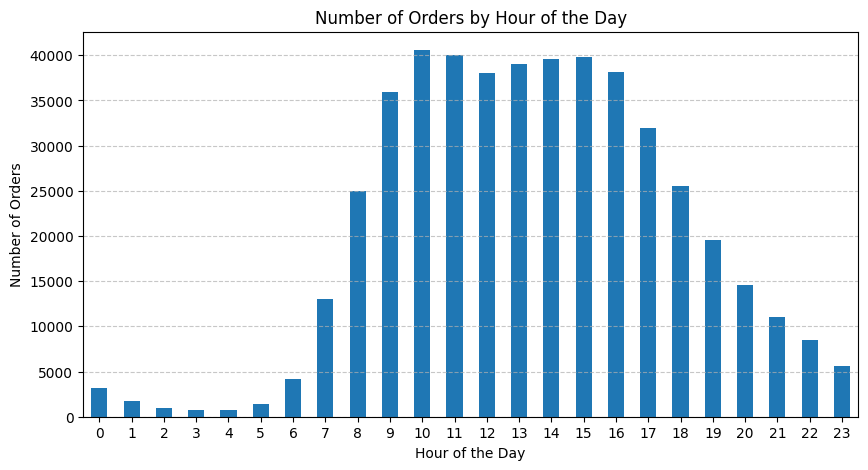

In [25]:
# Create a graph to vizualize what time of day people are shopping
import matplotlib.pyplot as plt

# Create a plot showing the number of orders for each hour of the day
plt.figure(figsize=(10,5))
orders_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')

# Formatting the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<b>Insights from this graph:</b>
This graph shows the distribution of orders throughout the day. Orders start picking up around 9am, and remain steady until about 5pm. There is a signifigantly smaller amount of orders between 10pm and 6am, which could be useful to the Instacart team when deciding when to push certain advertisements or marketing campaigns.
There is a clear peak between 10am - 4pm, which again could be useful for deciding when to push certain campaigns.

### [A3] What day of the week do people shop for groceries?

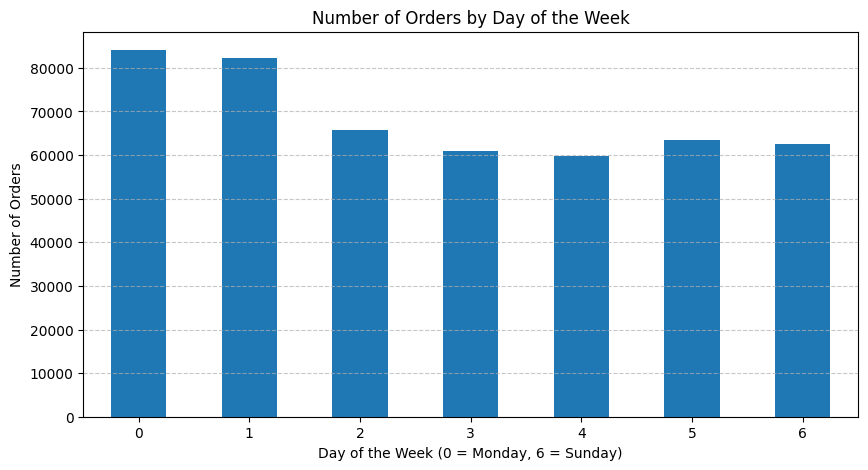

In [26]:
# Create a plot showing the number of orders for each day of the week
plt.figure(figsize=(10,5))
orders_df['order_dow'].value_counts().sort_index().plot(kind='bar')

# Formatting the plot
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


<b>Insights from this data:</b> This chart shows the distribution of orders by day of the week. It is clear more people order grocery at the beginning of the week, similar to how people shop in stores to prepare for the week. the orders then taper towards the end of the week, with a slight increase on the weekends. There is about a 25% increase from the lowest day (Friday) and the busiest day (Monday). 

### [A4] How long do people wait until placing another order?

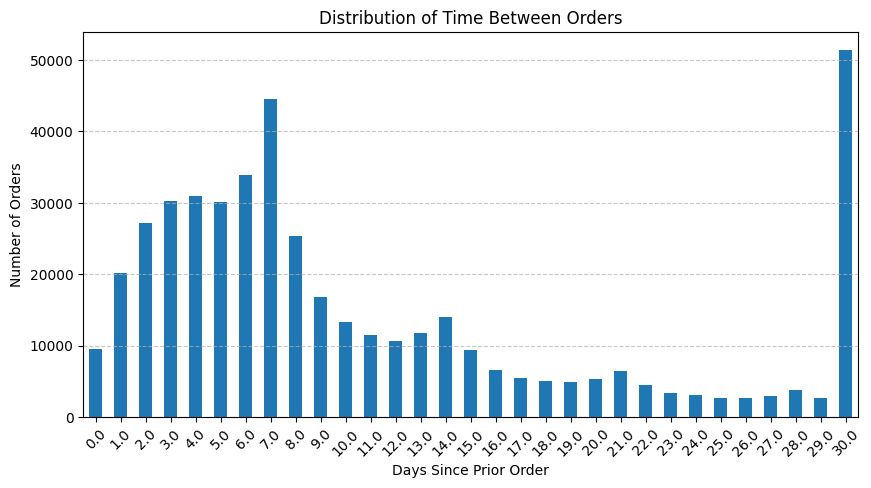

(np.float64(0.0), np.float64(30.0))

In [27]:
# Create a plot showing the distribution of days until the next order
plt.figure(figsize=(10,5))
orders_df['days_since_prior_order'].value_counts().sort_index().plot(kind='bar')

# Formatting the plot
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Time Between Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Get the minimum and maximum values for 'days_since_prior_order'
min_days_since_prior = orders_df['days_since_prior_order'].min()
max_days_since_prior = orders_df['days_since_prior_order'].max()

# Display the min and max values
min_days_since_prior, max_days_since_prior


This chart shows how many days customers wait between orders. Most customers wait about 7 days or less, with a week being the most popular time between orders. The spike at 30 days also includes customers who have waited 30 days or more between orders. It does not necessarily represent customers who have waited exactly 30 days between orders.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? 

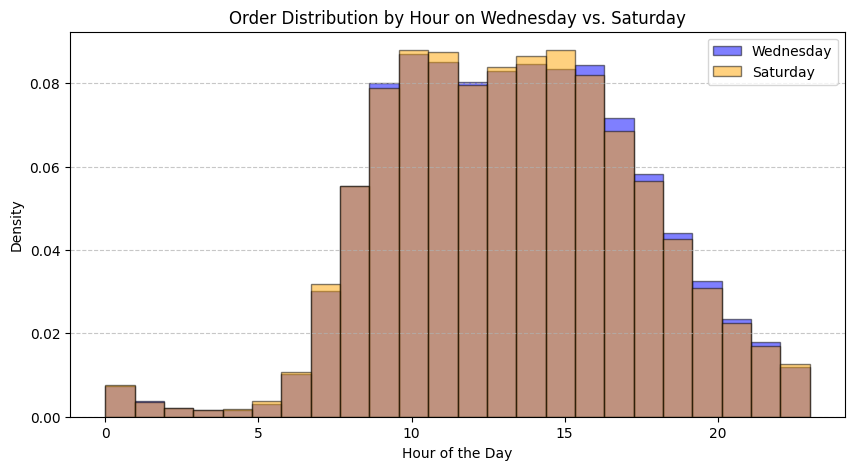

In [28]:
# Filter data for Wednesdays (order_dow = 2) and Saturdays (order_dow = 5)
wednesday_orders = orders_df[orders_df['order_dow'] == 2]['order_hour_of_day']
saturday_orders = orders_df[orders_df['order_dow'] == 5]['order_hour_of_day']

# Plot histograms for both days
plt.figure(figsize=(10,5))
plt.hist(wednesday_orders, bins=24, alpha=0.5, label='Wednesday', color='blue', edgecolor='black', density=True)
plt.hist(saturday_orders, bins=24, alpha=0.5, label='Saturday', color='orange', edgecolor='black', density=True)

# Formatting the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.title('Order Distribution by Hour on Wednesday vs. Saturday')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The histogram compares the order distribution between Wednesday (blue) and Saturday (orange.) 
The graph shows us that shoppers are active during similar times both days, only shopping slightly later on wednesdays.


### [B2] What's the distribution for the number of orders per customer?

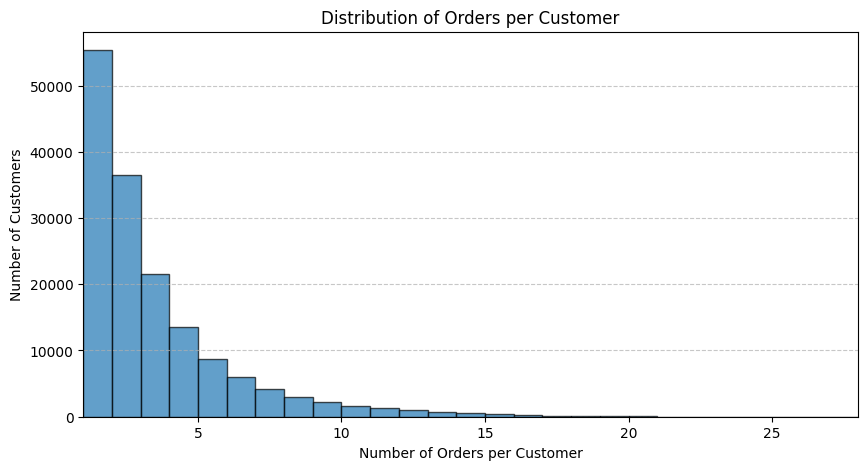

In [29]:
# Calculate the number of orders per customer
orders_per_customer = orders_df['user_id'].value_counts()

# Plot the distribution
plt.figure(figsize=(10,5))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max()+1), edgecolor='black', alpha=0.7)

# Formatting the plot
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders per Customer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(1, orders_per_customer.max())

# Show the plot
plt.show()


<h1>Insights</h1>
This chart shows us the number of orders each customer has placed. Most customers place fewer than five orders, with a signifigantly smaller amount placing more than 10. This information could be used by a customer retention team, to potentially figure out why customers are not placing many orders. It could be chalked up to the fact that people often only use delivery services as needed, and would not need much more than a few orders.

### [B3] What are the top 20 popular products?

In [30]:
# Count the most frequently ordered products
top_products = order_products_df['product_id'].value_counts().head(20).reset_index()
top_products.columns = ['product_id', 'order_count']

# Merge with the products dataset to get product names
top_products = top_products.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')

# Display the top 20 products with their IDs and names
top_products



,product_id,order_count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

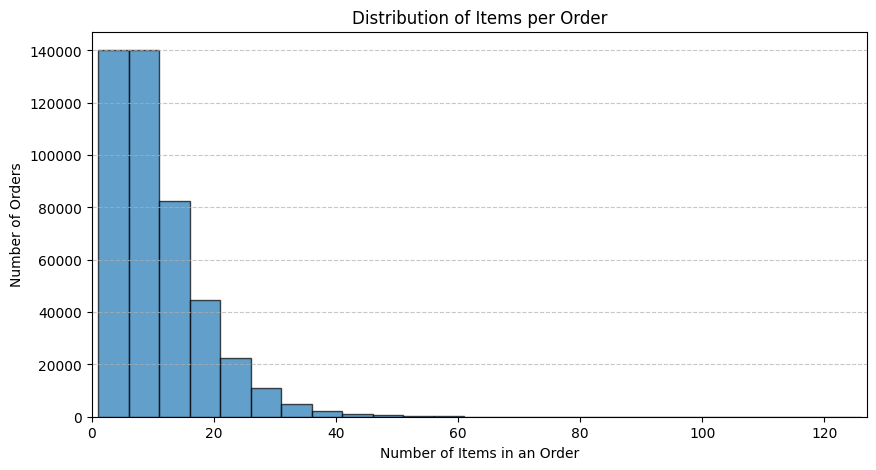

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

In [31]:
# Calculate the number of items per order
items_per_order = order_products_df.groupby('order_id')['product_id'].count()

# Plot the distribution of items per order
plt.figure(figsize=(10,5))
plt.hist(items_per_order, bins=range(1, items_per_order.max()+1, 5), edgecolor='black', alpha=0.7)

# Formatting the plot
plt.xlabel('Number of Items in an Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Items per Order')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, items_per_order.max())

# Show the plot
plt.show()

# Display descriptive statistics
items_per_order.describe()


The average number of items in an order is 10.1. 
The most common order size is 8 items.
25% of the orders have 5 or fewer items, while 75% have 14 or fewer.
The maximium amount of items in one order is 127 items.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [32]:
# Count the most frequently reordered products
top_reordered_products = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts().head(20).reset_index()
top_reordered_products.columns = ['product_id', 'reorder_count']

# Merge with the products dataset to get product names
top_reordered_products = top_reordered_products.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')

# Display the top 20 reordered products
top_reordered_products


,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [33]:
# Calculate reorder proportions for each product
reorder_proportions = order_products_df.groupby('product_id')['reordered'].mean().reset_index()
reorder_proportions.columns = ['product_id', 'reorder_proportion']

# Merge with the products dataset to get product names
reorder_proportions = reorder_proportions.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')

# Display the reorder proportion table
reorder_proportions.head()


,product_id,reorder_proportion,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange


##[C4] For each customer, what proportion of their products ordered are reorders?

In [34]:
# Calculate reorder proportion for each customer
customer_reorder_proportion = order_products_df.groupby('order_id')['reordered'].mean().reset_index()

# Merge with the orders dataset to get user_id
customer_reorder_proportion = customer_reorder_proportion.merge(orders_df[['order_id', 'user_id']], on='order_id', how='left')

# Calculate the average reorder proportion per user
customer_reorder_proportion = customer_reorder_proportion.groupby('user_id')['reordered'].mean().reset_index()
customer_reorder_proportion.columns = ['user_id', 'reorder_proportion']

# Display the reorder proportion table for customers
customer_reorder_proportion.head()


,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.944444


<h1>Conclusion:</h1>
The aim of the project was to analyze customer order behavior using Instacart's publicly provided order data. This includes shopping frequency, identifying patterns in reorder behavior, and investigating issues with the quality of the data, such as missing values in key columns and amending these issues.

Through successful data merging and preprocessing, key patterns in customer behavior were uncovered. Most notably, customer orders peaked between 10 AM and 4 PM, with significantly fewer orders placed during late-night hours. Weekly trends revealed a spike in orders at the beginning of the week, particularly on Mondays, aligning with common grocery shopping routines. Additionally, reorder patterns varied widely across users, with some showing very high proportions of repeated purchases, highlighting potential for personalized marketing strategies.

Addressing missing values ensuring consistency across merged datasets presented initial challenges. Figuring out the differnece between null values that represented "0", and values that were actually missing also posed challenges as well. This information could not be found using any command, and had to be inferred using context clues.

The findings provide actionable insights for marketing and operations teams at Instacart. For instance, promotional campaigns could be timed to align with peak shopping hours or tailored based on a user’s likelihood to reorder. Identifying heavy repeat customers offers a path to loyalty programs or targeted retention strategies.

Looking ahead, future work could expand by analyzing product-level trends, exploring demographic influences on shopping behavior, and integrating external datasets (like holidays or weather) to explain anomalies. Additionally, predictive modeling could further enhance understanding of reorder probability and timing, supporting even smarter, more personalized recommendations.
